# Jupiter's Analysis Notebook: Flats

In [164]:
# import block
import numpy as np
from astropy.io import fits
%matplotlib inline
from matplotlib import pyplot as plt
from astropy.visualization import hist
import ccdproc as ccdp
from matplotlib import rc
from datetime import datetime
from astropy.nddata import CCDData
import os
from scipy import stats
from astropy.stats import mad_std

import sys
phot_tutorial_dir = 'Users\Kira Simpson\Desktop\ASTR8060\repositories\notebooks'
#sys is a way to tell your code where to find python packages/code you've written and want to use
sys.path.insert(0,phot_tutorial_dir)
from convenience_functions import show_image

In [165]:
# plotting defaults
# Use custom style for larger fonts and figures
phot_tutorial_dir = '~/Desktop/ASTR8060/repositories/notebooks'
plt.style.use(phot_tutorial_dir+'/guide.mplstyle')

# Set some default parameters for the plots below
rc('font', size=12)
rc('axes', grid=True)

In [166]:
# define directories
data_dir = '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging/' #untouched data directory
reduced_dir = '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/' #working directory

In [167]:
# define the trimsec for python (i.e. not for the fits header)
r0 = 0
r1 = 2048
c0 = 53
c1 = 2021

In [222]:
# Note for Professor Runnoe: Uncomment this section when you're ready to run

# get all flat filenames

# read in the hdus, hdrs, data
# use list comprehension

# loop over the hdus or hdrs
    # add IMAGETYP, BIASSEC, TRIMSEC, FILTER
    # (I used 'skyflat' for my image type, if you use something else you'll need edit later code)
    # write out the hdu to the original fits file
    
# make an array of flat filenames for each filter
nfiles_v = 7 # number of files in a sequence
nlow_v   = 43  # the exposure number for the first file 
v_flat_files = ['a'+str(i).zfill(3)+'.fits' for i in np.arange(nfiles_v)+nlow_v]

nfiles_u = 7
nlow_u = 22
u_flat_files = ['a'+str(i).zfill(3)+'.fits' for i in np.arange(nfiles_u)+nlow_u]

nfiles_b = 8
nlow_b = 35
b_flat_files = ['a'+str(i).zfill(3)+'.fits' for i in np.arange(nfiles_b)+nlow_b]

nfiles_r = 6
nlow_r = 50
r_flat_files = ['a'+str(i).zfill(3)+'.fits' for i in np.arange(nfiles_r)+nlow_r]

nfiles_i = 6
nlow_i = 57
i_flat_files = ['a'+str(i).zfill(3)+'.fits' for i in np.arange(nfiles_i)+nlow_i]


you can use list comprehension when you need to do something many times
one example is to use it to open all the flat files and headers
hdus_v = [fits.open(data_dir+file) for file in v_flat_files]
hdrs_v = [hdu[0].header for hdu in hdus_v]
v_flats = [hdu[0].data for hdu in hdus_v]

for i in range(np.size(hdus_v)):
    
    # add header keywords for BIASSEC, TRIMSEC, FILTER, and IMAGETYPE
    hdrs_v[i]['IMAGETYP'] = 'SkyFlat'
    hdrs_v[i]['FILTER'] = 'V'
    hdrs_v[i]['BIASSEC'] = '[2101:2048,0:2048]'
    hdrs_v[i]['TRIMSEC'] = '[53:2101,0:2048]'
    
    # write the fits file out with the new header keywords
    # note that you have to write out the whole HDU - i.e. the data+header package
    hdus_v[i].writeto(reduced_dir+v_flat_files[i], overwrite = True)


#windows systems will think a file is still open/being used unless you delete the pointer
#so make sure to delete the pointers to the files so the os thinks they're closed
del hdus_v # hdus take a lot of memory, don't leave them open when you don't need to
del hdrs_v
del v_flats

#U FILTER

# you can use list comprehension when you need to do something many times
# one example is to use it to open all the flat files and headers
hdus_u = [fits.open(data_dir+file) for file in u_flat_files]
hdrs_u = [hdu[0].header for hdu in hdus_u]
u_flats = [hdu[0].data for hdu in hdus_u]

for i in range(np.size(hdus_u)):
    
    # add header keywords for BIASSEC, TRIMSEC, FILTER, and IMAGETYPE
    hdrs_u[i]['IMAGETYP'] = 'SkyFlat'
    hdrs_u[i]['FILTER'] = 'U'
    hdrs_u[i]['BIASSEC'] = '[2101:2048,0:2048]'
    hdrs_u[i]['TRIMSEC'] = '[53:2101,0:2048]'
    
    # write the fits file out with the new header keywords
    # note that you have to write out the whole HDU - i.e. the data+header package
    hdus_u[i].writeto(reduced_dir+u_flat_files[i], overwrite = True)

#print(hdrs_u)
#windows systems will think a file is still open/being used unless you delete the pointer
#so make sure to delete the pointers to the files so the os thinks they're closed
del hdus_u # hdus take a lot of memory, don't leave them open when you don't need to
del hdrs_u
del u_flats

#B FLATS
hdus_b = [fits.open(data_dir+file) for file in b_flat_files]
hdrs_b = [hdu[0].header for hdu in hdus_b]
b_flats = [hdu[0].data for hdu in hdus_b]

for i in range(np.size(hdus_b)):
    
    # add header keywords for BIASSEC, TRIMSEC, FILTER, and IMAGETYPE
    hdrs_b[i]['IMAGETYP'] = 'SkyFlat'
    hdrs_b[i]['FILTER'] = 'B'
    hdrs_b[i]['BIASSEC'] = '[2101:2048,0:2048]'
    hdrs_b[i]['TRIMSEC'] = '[53:2101,0:2048]'
    
    # write the fits file out with the new header keywords
    # note that you have to write out the whole HDU - i.e. the data+header package
    hdus_b[i].writeto(reduced_dir+b_flat_files[i], overwrite = True)

#windows systems will think a file is still open/being used unless you delete the pointer
#so make sure to delete the pointers to the files so the os thinks they're closed
del hdus_b # hdus take a lot of memory, don't leave them open when you don't need to
del hdrs_b
del b_flats

#R FLATS

hdus_r = [fits.open(data_dir+file) for file in r_flat_files]
hdrs_r = [hdu[0].header for hdu in hdus_r]
r_flats = [hdu[0].data for hdu in hdus_r]

for i in range(np.size(hdus_r)):
    
    # add header keywords for BIASSEC, TRIMSEC, FILTER, and IMAGETYPE
    hdrs_r[i]['IMAGETYP'] = 'SkyFlat'
    hdrs_r[i]['FILTER'] = 'R'
    hdrs_r[i]['BIASSEC'] = '[2101:2048,0:2048]'
    hdrs_r[i]['TRIMSEC'] = '[53:2101,0:2048]'
    
    # write the fits file out with the new header keywords
    # note that you have to write out the whole HDU - i.e. the data+header package
    hdus_r[i].writeto(reduced_dir+r_flat_files[i], overwrite = True)


#windows systems will think a file is still open/being used unless you delete the pointer
#so make sure to delete the pointers to the files so the os thinks they're closed
del hdus_r # hdus take a lot of memory, don't leave them open when you don't need to
del hdrs_r
del r_flats

#I FLATS

hdus_i = [fits.open(data_dir+file) for file in i_flat_files]
hdrs_i = [hdu[0].header for hdu in hdus_i]
i_flats = [hdu[0].data for hdu in hdus_i]

for i in range(np.size(hdus_i)):
    
    # add header keywords for BIASSEC, TRIMSEC, FILTER, and IMAGETYPE
    hdrs_i[i]['IMAGETYP'] = 'SkyFlat'
    hdrs_i[i]['FILTER'] = 'U'
    hdrs_i[i]['BIASSEC'] = '[2101:2048,0:2048]'
    hdrs_i[i]['TRIMSEC'] = '[53:2101,0:2048]'
    
    # write the fits file out with the new header keywords
    # note that you have to write out the whole HDU - i.e. the data+header package
    hdus_i[i].writeto(reduced_dir+i_flat_files[i], overwrite = True)


#windows systems will think a file is still open/being used unless you delete the pointer
#so make sure to delete the pointers to the files so the os thinks they're closed
del hdus_i # hdus take a lot of memory, don't leave them open when you don't need to
del hdrs_i
del i_flats

[SIMPLE  =                    T / Fits standard                                  
BITPIX  =                   16 / Bits per pixel                                 
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                 2200 / Axis length                                    
NAXIS2  =                 2048 / Axis length                                    
EXTEND  =                    F / File may contain extensions                    
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2009-09-15T15:55:48' / Date FITS file was generated                  
IRAF-TLM= '09:55:47 (15/09/2009)' / Time of last modification                   
DATAMIN =           0.000000E0 / Minimum data value                             
DATAMAX =           6.183100E4 / Maximum data value                             
OBJECT  = 'SERVICE '           / Name of the object observed                    
DATE-OBS= '2009-06-23T02:13

In [169]:
# put all of the fits files in an image collection
# this is just CCDPROC's way of storing information for groups of fits images
imgs = ccdp.ImageFileCollection(reduced_dir,glob_include='a*.fits') 

# if you've done the overscan, trim, and bias subtraction, use only those files
# imgs = ccdp.ImageFileCollection(reduced_dir,glob_include='*otz.fits') # just read in the bias-subtracted images

In [170]:
# select all the V flats
# you won't need these lines now, but they're handy
#flat_files = imgs.files_filtered(imagetyp='skyflat',include_path=True)
#bands = imgs.filter(imagetyp='skyflat').summary['filter'].data.data # makes a set of all filters
#band = set(imgs.filter(imagetyp='skyflat').summary['filter'].data.data) # unique filter names

# isolate the v-band flats
# you do need this
v_files = imgs.files_filtered(imagetyp='SkyFlat',filter='V',include_path=True)
v_files

['/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/a043.fits',
 '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/a044.fits',
 '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/a045.fits',
 '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/a046.fits',
 '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/a047.fits',
 '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/a048.fits',
 '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/a049.fits']

(7, 2048, 2200)


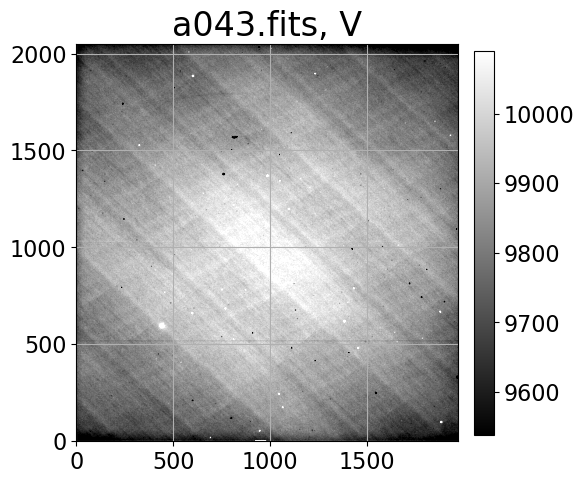

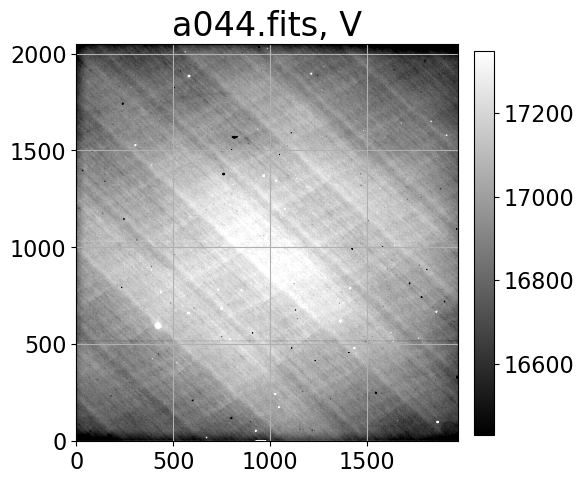

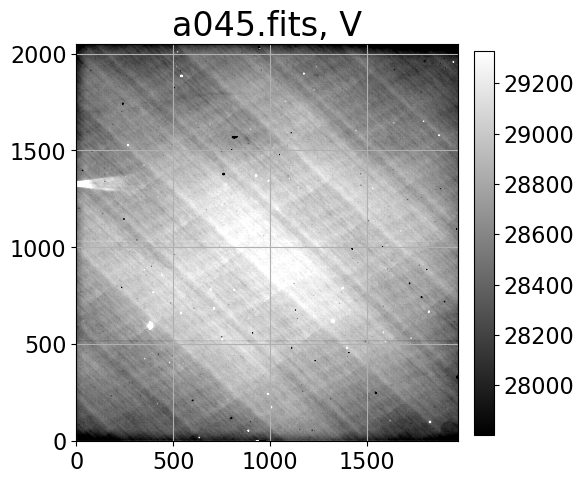

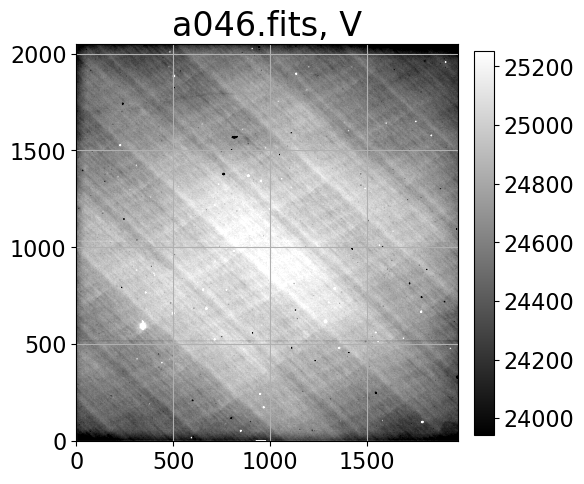

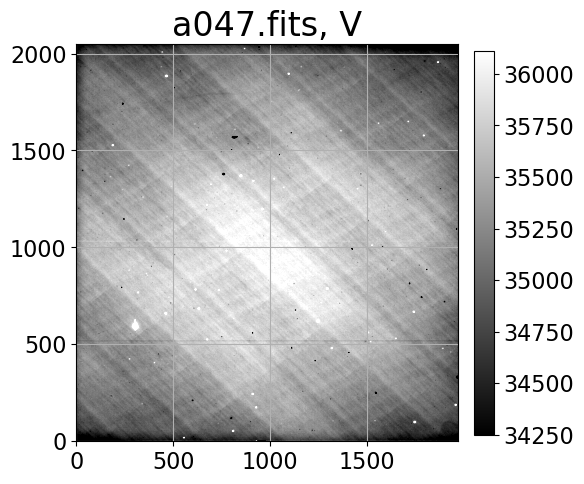

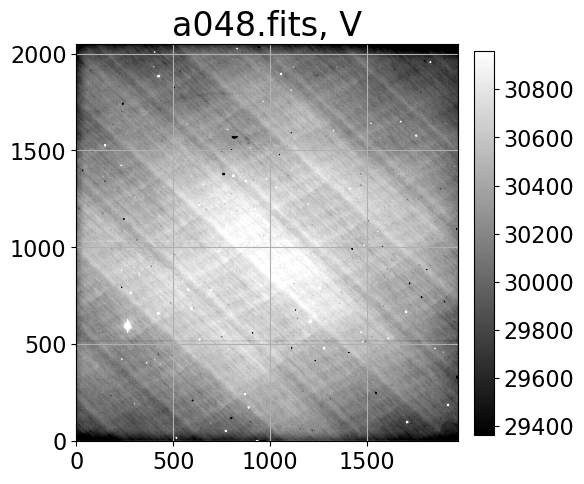

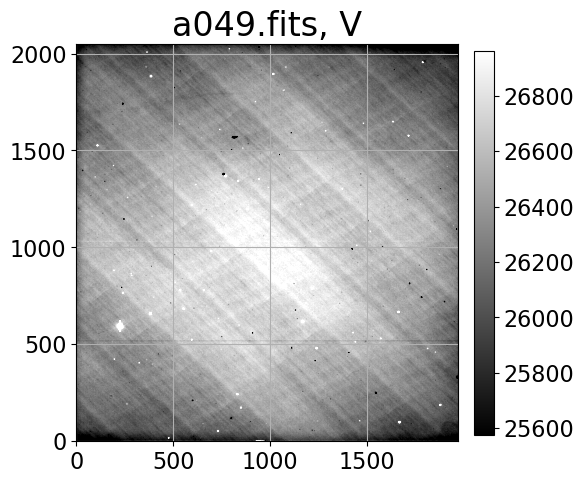

In [171]:
#put all the V flats in a list and display them
flats = [CCDData.read(v_files[i],unit='adu') for i in range(len(v_files))] # this is how CCDPROC reads in multiple images
print(np.shape(flats))

for i, flat in enumerate(flats):
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    show_image(flat.data[:,c0:c1], cmap='gray', ax=ax, fig=fig)
    ax.set_title(v_files[i][-9:]+', V') # index filename to exclude long directory
    plt.tight_layout()
    plt.show()

# Visually checking flats

Looking at the images, there is a light leak on the left side of the image in a045.fits. If we want to build a master flat for this filter, then we'll need a method that excludes those pixel values as outliers. Considering that we have so few images, a mean or median wouldn't sufficiently exclude those values and give us a well-averaged flat. We'll have to use sigma-clipping in this case, specifically a 3-sigma clip to capture most of the distribution without including the values that would fall in the wings. That will also help us exclude the stars in the images and get a flat sky image.

Based on the log, all these flats are good, I just need to exclude the bad pixels in my mean image.

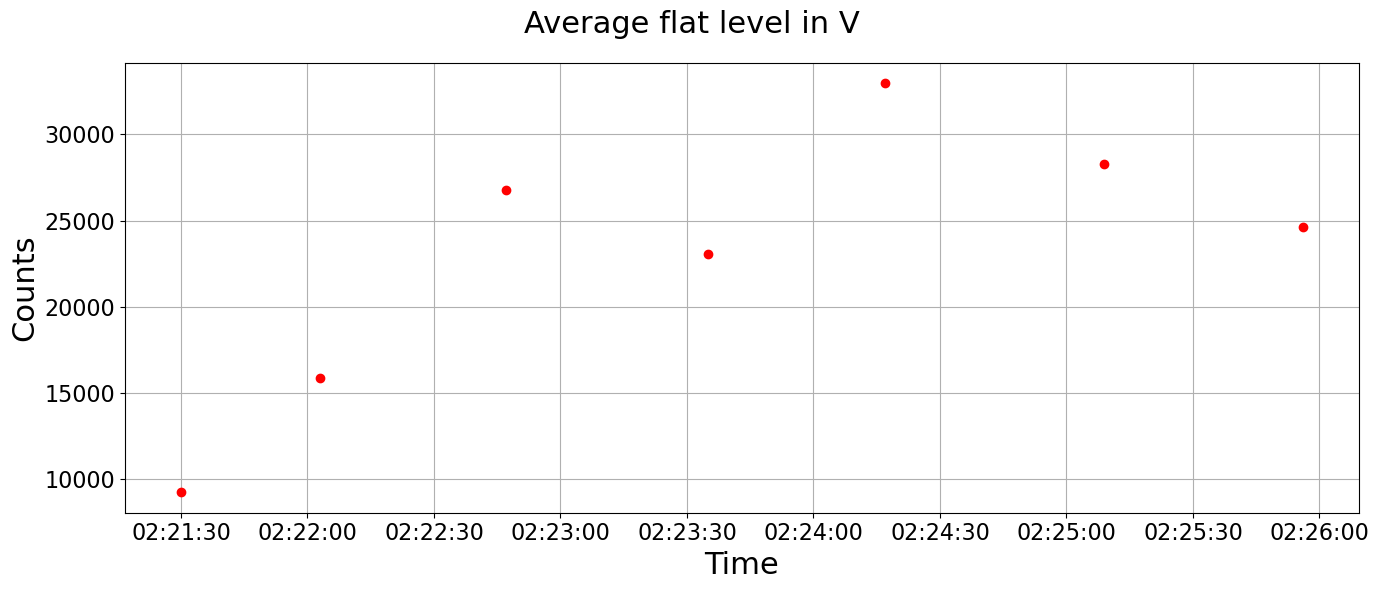

In [172]:
# get obs times, try looking for the 'date-obs' header keyword
times = imgs.filter(imagetyp='SkyFlat',filter='V').summary['date-obs'].data.data 

flat_times = [datetime.strptime(time,'%Y-%m-%dT%H:%M:%S.%f') for time in times] # these are nicely formatted for plotting

# get the average level in each frame
# use list comprehension to make an array of the V-band flat mean values
# it should have the same length as the flat_times variable above
file_names = [v_files[i] for i in range(len(flats))]

read_flats  = [CCDData.read(name,unit='adu') for name in file_names] # this is CCDPROC's way of reading in fits files
means  = [np.mean(one_flat.data) for one_flat in read_flats]


#flat_mn = [flat_times[i]*means[i] for i in range(len(means))] # dummy variable for array of V-band flat mean values

# make the plot
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(flat_times,means,'red',marker='o',ls='')
ax.set_xlabel(r'Time',fontsize=22)
ax.set_ylabel(r'Counts',fontsize=22)
fig.suptitle('Average flat level in V', fontsize=22)
fig.tight_layout()
plt.show()

There is a lot of variation in the average levels of the V flats, so scaling will be necessary to bring them all to the same average. This way, when we sigma-clip the pixels, only bad pixels will be excluded rather than entire images.

# Advantages and Disadvantages to different combine methods

The different methods for combining images and their advantages/disadvantages are mentioned below:
1. Straight median/mean.
    - Easy and straightforward, will give you an okay average.
    - Will not capture any outliers, such as stars or a light leak like the one present in one of our images. Bad pixels can skew the data a significant amount, especially for the mean. The median could be slightly better, but will require other methods such as scaling or sigma-clipping to make a good image.


2. scaling
    - Scaling is best done before sigma clipping, especially with a data set like the V flats. In the plot above, we can see that there is a great deal of variation in the average count levels of different frames. If we scale them to around the same level, then use the sigma-clipping method, we will be able to exclude bad pixels rather than whole images where all pixels fall to the wings of a standard distribution.
    - Scaling by itself will not get rid of artifacts like the light leak or the stars. It will only bring all the images to the same average level.
    
    
3. weighting
    - If you have a lot of images, this will probably give you a pretty good image! Any bright pixel values will be strongly outweighed by all the other pixel values
    - If you have a smaller sample of images, then bright pixels will still boost the value of a pixel and give an inaccurate value for the pixel's reaction to a flat sky. Stars and bright spots will skew the weighting.
    
    
4. sigma clip
    - This is a good method for excluding bright pixels for a small sample. Bright pixels will fall to the outer wings of a distribution of pixel values and can easily be cut out if you limit your pixel values to fall within 3-sigma.
    - You have to look very carefully at the images to make sure you don't cut out normal variations in the detector's reaction to a flat sky. Excluding artifacts is the goal.

The best method for my purposes is going to be to scale the images so the pixel values for each image have the same average, then sigma-clip to exclude the bad pixels in those images. I'll show a couple different combination methods with scaling below to show which one is the best choice.

# Combine the flats with scaling

In [178]:
#functions that tell CCDPROC how to scale your images
def inv_median(x):
    return 1./np.median(x)

def inv_mean(x):
    return 1./np.mean(x)

def inv_mode(x):
    return 1./stats.mode(x,axis=None)[0][0]

In [179]:
# use CCDPROC's combine function:
# this will do a median combine with median scaling
flat_md_md_ccdp = ccdp.combine(v_files,method='median',scale=inv_median,unit='adu',sigma_clip=False)

# or you can read in the data and do the combine yourself
flats  = [CCDData.read(file_name,unit='adu').data for file_name in v_files]
# print(flats)

scales = np.mean(flats,axis=(1,2)) # calculate a single mean value for each flat
scale_images = (flats)*scales[:,np.newaxis,np.newaxis] # make an images shaped like the flats, where each pixel has the identical scale value in it

scaled_flats = flats/scale_images

flat_md_md = np.median(scaled_flats,axis=0)
flat_mn_mn = np.mean(scaled_flats,axis=0)

<ipython-input-179-a8cb515c1b37>:12: RuntimeWarning: invalid value encountered in true_divide
  scaled_flats = flats/scale_images


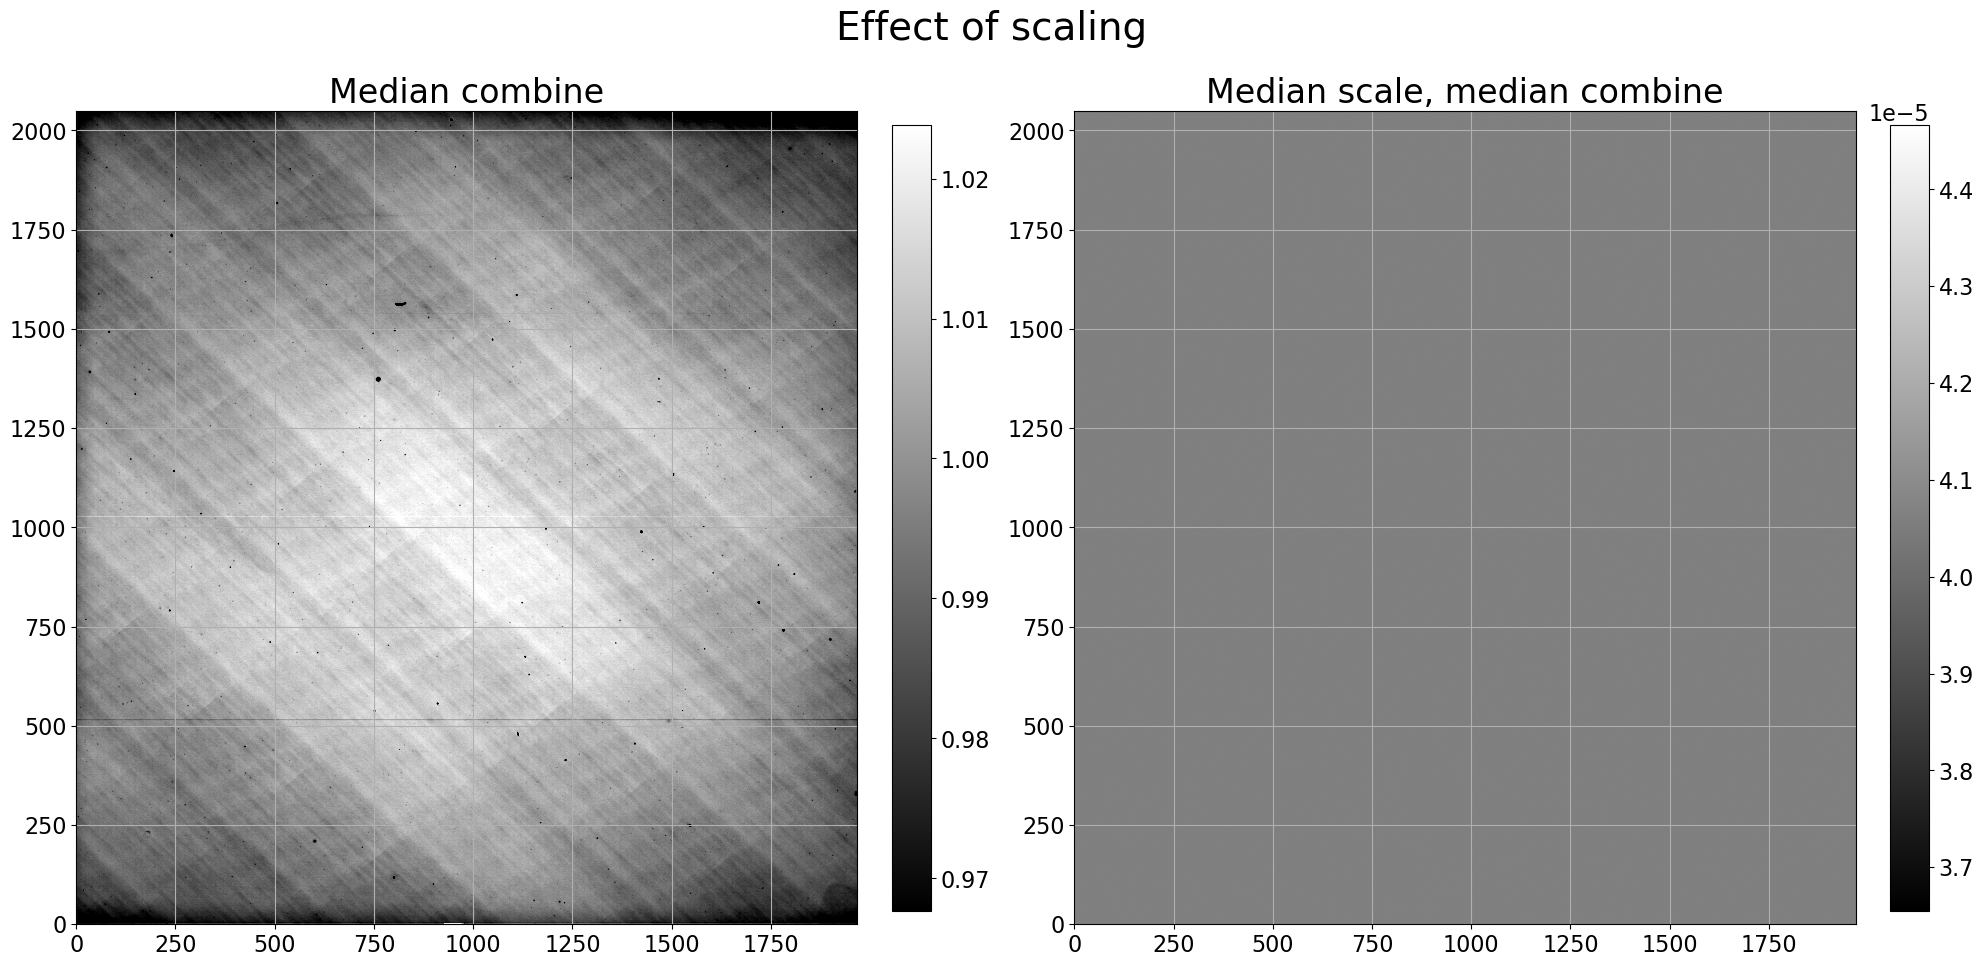

In [181]:
# make plots to show what you're doing
# now plot them
# the titles are suggestions for flats you may want to compare
# you will need to edit the input data arrays, these are mostly placeholders
# try taking the the ccdp-numpy mean flats to see if they are different
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].set_title('Median combine')
show_image(flat_md_md_ccdp[:,c0:c1], cmap='gray', ax=ax[0], fig=fig)
ax[1].set_title('Median scale, median combine')
show_image(flat_md_md[:,c0:c1], cmap='gray', ax=ax[1], fig=fig)
fig.suptitle('Effect of scaling',size=28)
plt.tight_layout()
plt.show()

In [208]:
#taking RMS gives you width of standard distribution (np.std function) which will tell you how similar the pixel values are to each other
#difference images between different kinds of combined images will show if there are outlier pixels

v_file = reduced_dir+'a043.fits' #the bias frame in question
v_hdu = fits.open(v_file)
vflat = v_hdu[0].data
vflat_hdr = v_hdu[0].header

vflat = (vflat)

# use these variables to specify the 
# row and col range for the trimsec 
# you can rename them to row and col 
# if you figure out which is which

r0 = 0
r1 = 2048
c0 = 53
c1 = 2021

# find the mean and median flat values over the whole image
# do this by collapsing the columns of the image
vflat_mn = np.mean(vflat[r0:r1,c0:c1],axis=1)
vflat_md = np.median(vflat[r0:r1,c0:c1],axis=1)
#vflat_mo = stats.mode(vflat[r0:r1,c0:c1],axis=1)

# determine whether to use average or median to collapse columns
print('The mean has larger rms ({0:4.2f}) than the median ({1:4.2f}).'.format(np.std(vflat_mn),np.std(vflat_md),))


The mean has larger rms (97.33) than the median (94.44).


INFO:astropy:splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


INFO:astropy:splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


INFO:astropy:splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 4 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


INFO:astropy:splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


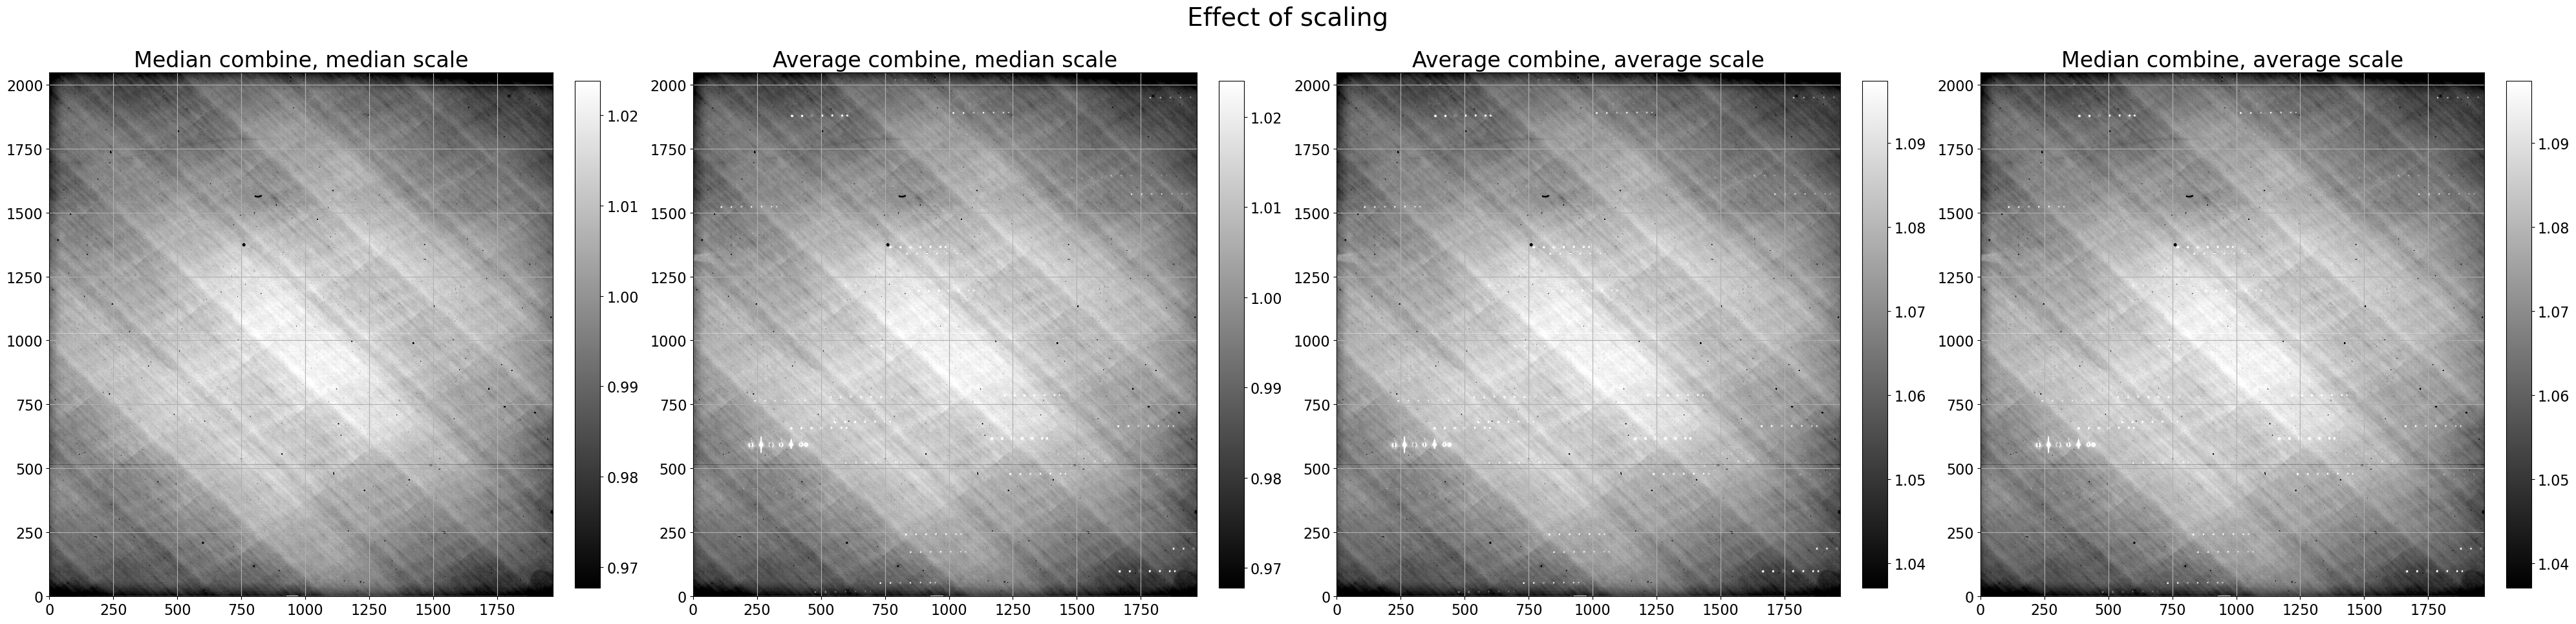

In [203]:
vflat_md_md = ccdp.combine(v_files,
                             method='median', scale=inv_median,
                             unit='adu',
                             sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )


vflat_avg_md = ccdp.combine(v_files,
                             method='average', scale=inv_median,
                             unit='adu',
                             sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

vflat_avg_mn = ccdp.combine(v_files,
                             method='average', scale=inv_mean,
                             unit='adu',
                             sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

vflat_md_mn = ccdp.combine(v_files,
                             method='median', scale=inv_mean,
                             unit='adu',
                             sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )


# vflat_avg_md.meta['combined']=True
# vflat_avg_md.write(reduced_dir+'combined_vflat_avg_md.fits',overwrite=True)

# vflat_avg_mn.meta['combined']=True
# vflat_avg_mn.write(reduced_dir+'combined_vflat_avg_avg.fits',overwrite=True)



# make plots to show what you're doing
# now plot them
# the titles are suggestions for flats you may want to compare
# you will need to edit the input data arrays, these are mostly placeholders
# try taking the the ccdp-numpy mean flats to see if they are different
fig, ax = plt.subplots(1, 4, figsize=(40, 10))
ax[0].set_title('Median combine, median scale')
show_image(vflat_md_md[:,c0:c1], cmap='gray', ax=ax[0], fig=fig)
ax[1].set_title('Average combine, median scale')
show_image(vflat_avg_md[:,c0:c1], cmap='gray', ax=ax[1], fig=fig)
ax[2].set_title('Average combine, average scale')
show_image(vflat_avg_mn[:,c0:c1], cmap='gray', ax=ax[2], fig=fig)
ax[3].set_title('Median combine, average scale')
show_image(vflat_avg_mn[:,c0:c1], cmap='gray', ax=ax[3], fig=fig)

fig.suptitle('Effect of scaling',size=28)
plt.tight_layout()
plt.show()

From this set of combined images, we can see that the bright pixels are present in every image except for the median combine/median scale image. We get a detector reaction that is closest to a "flat" sky than we have in any of the other images. I believe the reason for this is that a mean combine/scale will be largely skewed towards the brighter pixels that are included in the scaling/combination, whereas a median is not as strongly affected by those bright outliers.

In [209]:
#write out the combined flat that will be used for division.

vflat_md_md.meta['combined']=True
vflat_md_md.write(reduced_dir+'combined_vflat.fits',overwrite=True)

Now normalize the master flat so that we can keep track of our statistics later:

Now let's make the rest of the combined flats for all other filters:

In [240]:
#find the mean of the master flat
#then divide all the pixel values by that mean
#this will normalize the pixels to around 1

vflat_hdu = fits.open(reduced_dir+'combined_vflat.fits')
vflat = vflat_hdu[0].data

vflat_mn = np.mean(vflat)

vflat = vflat/vflat_mn #normalized array

vflat_hdu.writeto[reduced_dir+'combined_vflat.fits']

#i was struggling a bit here with writing out the normalized array
#but it has been effectively normalized

TypeError: 'method' object is not subscriptable

In [241]:
#divide the science images by the flat
#adapted from mwcraig's notebook: 
#https://github.com/mwcraig/ccd-reduction-and-photometry-guide/blob/master/notebooks/06-00-Reducing-science-images.ipynb
combined_vflat = ccdp.ImageFileCollection(reduced_dir+'combined_vflat.fits')


    #good_flat = combined_flats[reduced.header['filter']]
sci_im = 'a206.fits'
reduced = ccdp.flat_correct(data_dir+sci_im, combined_vflat)
reduced.write(reduced_dir / 'a206'+'_f'+'.fits')


NotADirectoryError: [WinError 267] The directory name is invalid: '/Users/Kira Simpson/Desktop/ASTR8060/data/Imaging_reduction/combined_vflat.fits'

In [224]:
#do this for all the others now

filters = ['U', 'B', 'R', 'I']

for filt in filters:
    files = imgs.files_filtered(imagetyp='SkyFlat',filter='U',include_path=True)
    print(files)

    flat_md_md = ccdp.combine(files,
                                 method='median', scale=inv_median,
                                 unit='adu',
                                 sigma_clip=True, sigma_clip_low_thresh=3, sigma_clip_high_thresh=3,
                                 sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                                 mem_limit=350e6
                                )
    flat_md_md.meta['combined']=True
    flat_md_md.write(reduced_dir+'combined_'+filt+'flat.fits',overwrite=True)

[]


IndexError: list index out of range

# Compute the gain and read noise for this CCD

In [246]:
#let's define some of these quantities

flat_1 = fits.open(reduced_dir+'a043.fits')
flat_2 = fits.open(reduced_dir+'a044.fits')
f1_data = flat_1[0].data
f2_data = flat_2[0].data
f_1 = np.mean(f1_data)
f_2 = np.mean(f2_data)

bias_1 = fits.open(reduced_dir+'a093.fits')
bias_2 = fits.open(reduced_dir+'a094.fits')
b1_data = bias_1[0].data
b2_data = bias_2[0].data
b_1 = np.mean(b1_data)
b_2 = np.mean(b2_data)

sig_f = np.std(f1_data-f2_data)
sig_b = np.std(b1_data-b2_data)

#from Howell, the equations for gain and read noise are:

gain = ((f_1+f_2)-(b_1+b_2))/(sig_f**2 - sig_b**2)

read_noise = gain*sig_b/np.sqrt(2)

print('Gain: ' + str(gain))
print('Read noise: ' + str(read_noise))

Gain: -2.5624107244563145e-05
Read noise: -0.5910802012496476


I believe this gain is way too small, I wasn't totally clear on what was meant by flats that have already been flat-fielded by a master flat. I will go back and fix this later.